In [52]:
import numpy as np
from numpy.linalg import inv
from matplotlib import pyplot as plt
import seaborn as sns
import sympy

In [53]:
n = 15
b = 0.5
err = 1e-6

def create_matrix(n, b):
    a = np.eye(n) * 2 + np.eye(n, k=1) * -1 + np.eye(n, k=1) * -b + np.eye(n, k=-1) * -1 + np.eye(n, k=-1) * b
    return a

def create_term(n):
    f = np.zeros(n)
    f[0] = 1 - b
    f[n-1] = 1 + b
    return f

a = create_matrix(n, b)
f = create_term(n)

## Convergence check

In [54]:
def is_convergence(n):
    mat = [[0 for i in range(n)] for i in range(n)]
    x = sympy.Symbol('x')

    for i in range(n):
        for j in range(n):
            if i == j:
                mat[i][j] = 2 * x
            elif i - j == 1:
                mat[i][j] = (-1 + b) * x
            elif j - i == 1:
                mat[i][j] = (-1 - b)
            else:
                mat[i][j] = 0

    mat = sympy.Matrix(mat)
    # print(mat.det(), mat)

    return max(np.roots(mat.det().as_poly().coeffs())) < 1
is_convergence(n)

True

In [55]:
def seidel(a, f):
    err = 1e-6
    iter = 0
    u = np.zeros(n)
    u_new = np.zeros(n)
    iterations = 0

    converged = False

    while not converged:
        for i in range(n):
            sum_1 = sum([a[i][j] * u[i] for j in range(i+1, n)])
            sum_2 = sum(a[i][j] * u_new[j] for j in range(i))
            u_new[i] = (f[i] - sum_1 - sum_2) / a[i][i]
        converged = sum(abs(u_new[j]-u[j]) for j in range(n)) < err
        u = u_new.copy()
        iterations += 1
    return u, iterations
seidel(a, f)

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 0.99999999, 0.99999997,
        0.9999999 , 0.99999969, 0.99999909, 0.9999975 , 0.99999938]),
 126)

# Визуализация

Text(0, 0.5, 'Iterations')

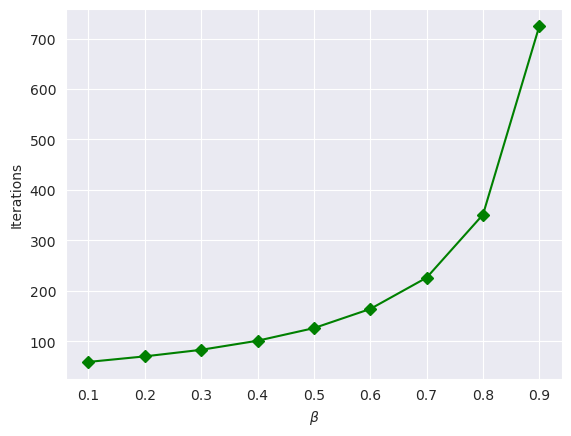

In [56]:
b_arr = np.arange(0.1, 1, step=0.1)

a_arr = [create_matrix(15, i) for i in b_arr]
f = create_term(15)

fig, ax = plt.subplots()

sns.set_style('darkgrid')

iterations = [seidel(i, f)[1] for i in a_arr]
ax.plot(b_arr, iterations,'gD-')
ax.set_xlabel(r'$\beta$')
ax.set_ylabel('Iterations')